# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Summary:
asdfasdfasdf

### Description:
asdfasdfas

In [ ]:
#pip install missingno

In [1]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
import missingno as msno
warnings.filterwarnings('ignore') #ignoring warnings

In [2]:
# NOTE: need to change file per user
df_raw = pd.read_csv(r'C:\Data\used_cars_data.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')

In [3]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [4]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 3000040
Total # of Columns: 66


### Reducing Dataset Attributes
The total dataset has about 66 total columns. After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

...

In [5]:
#subsetting columns by referencing the column indexes
df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 40 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vin                   object 
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   combine_fuel_economy  float64
 5   daysonmarket          int64  
 6   engine_cylinders      object 
 7   engine_displacement   float64
 8   engine_type           object 
 9   exterior_color        object 
 10  frame_damaged         object 
 11  franchise_dealer      bool   
 12  franchise_make        object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

In [ ]:
msno.matrix(df_cln_1)

In [6]:
# removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty
df_cln_2 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_2.shape[1])

39


### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

In [7]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','interior_color','isCab','is_new','length','listed_date','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','wheel_system_display','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

['I4' 'H4' 'V6' 'I6' 'V6 Diesel' nan 'V8' 'V8 Biodiesel'
 'V8 Flex Fuel Vehicle' 'V6 Flex Fuel Vehicle' 'I4 Hybrid' 'V6 Hybrid'
 'I3' 'I5' 'I4 Flex Fuel Vehicle' 'I4 Diesel' 'I6 Diesel' 'V8 Diesel' 'R2'
 'W12' 'V10' 'V12' 'V6 Biodiesel' 'H6' 'I2' 'W12 Flex Fuel Vehicle'
 'I5 Biodiesel' 'V8 Hybrid' 'H4 Hybrid' 'V8 Compressed Natural Gas'
 'I6 Hybrid' 'I5 Diesel' 'W8' 'I4 Compressed Natural Gas' 'V10 Diesel'
 'W16' 'V8 Propane' 'I3 Hybrid' 'V6 Compressed Natural Gas' 'V12 Hybrid']
['Solar Yellow' 'Narvik Black' 'None' ... 'Low Vol Bright Red' 'Modern S'
 'Cosmic']
[nan False True]
[ True False]
['Jeep' 'Land Rover' 'FIAT' 'Chevrolet' 'Cadillac' 'Chrysler' 'Dodge'
 'RAM' nan 'Kia' 'Mazda' 'Audi' 'Hyundai' 'Ford' 'Toyota' 'Lincoln'
 'Volvo' 'GMC' 'Volkswagen' 'BMW' 'Lexus' 'Buick' 'Subaru' 'Scion' 'Honda'
 'Nissan' 'Acura' 'INFINITI' 'Porsche' 'Rolls-Royce' 'Bentley'
 'Lamborghini' 'Mercedes-Benz' 'Jaguar' 'Maserati' 'Alfa Romeo' 'Ferrari'
 'MINI' 'Mitsubishi' 'Aston Martin' 'Lotus' 'McLar

['YELLOW' 'BLACK' 'UNKNOWN' 'GRAY' 'SILVER' 'WHITE' 'RED' 'BLUE' 'ORANGE'
 'BROWN' 'GOLD' 'TEAL' 'GREEN' 'PURPLE' 'PINK']
['Jeep' 'Land Rover' 'Subaru' 'Mazda' 'Alfa Romeo' 'BMW' 'Hyundai'
 'Chevrolet' 'Lexus' 'Cadillac' 'Chrysler' 'Dodge' 'Mercedes-Benz'
 'Nissan' 'Honda' 'Kia' 'Ford' 'Lincoln' 'Audi' 'Jaguar' 'Volkswagen'
 'RAM' 'Porsche' 'Toyota' 'INFINITI' 'GMC' 'Acura' 'Maserati' 'FIAT'
 'Volvo' 'Mitsubishi' 'Buick' 'Mercury' 'Scion' 'Saab' 'MINI' 'Ferrari'
 'Genesis' 'Saturn' 'Bentley' 'Suzuki' 'Tesla' 'Fisker' 'Pontiac'
 'Lamborghini' 'smart' 'Hummer' 'Rolls-Royce' 'Lotus' 'Spyker' 'McLaren'
 'Aston Martin' 'Kaiser' 'Oldsmobile' 'Maybach' 'Freightliner' 'Karma'
 'Isuzu' 'Plymouth' 'Shelby' 'Triumph' 'MG' 'Pagani' 'Datsun' 'Studebaker'
 'AM General' 'Austin-Healey' 'AMC' 'Hudson' 'Willys' 'Pininfarina'
 'Sunbeam' 'Geo' 'Opel' 'SRT' 'Edsel' 'VPG' 'Eagle' 'Bugatti' 'Daewoo'
 'Hillman' 'Austin' 'Morris' 'Packard' 'Humber' 'DeTomaso'
 'International Harvester' 'Ariel' 'DeSoto' 'Allar

In [8]:
#observing if 'engine_cylinders','engine_type' is the same data
if df_cln_2['engine_cylinders'].equals(df_cln_2['engine_type']) == True:
    df_cln_2 = df_cln_2.drop(columns='engine_cylinders')
    print(df_cln_2.shape[1])

38


After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

In [9]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

['12.7 gal' '17.7 gal' '15.9 gal' '23.5 gal' '16.6 gal' '13.2 gal'
 '10.5 gal' '15.8 gal' '22.5 gal' '14.8 gal' '14 gal' '17.4 gal'
 '19.4 gal' '22 gal' '24.6 gal' '13.5 gal' nan '16.9 gal' '18.8 gal'
 '27.6 gal' '21.5 gal' '15.6 gal' '18.5 gal' '26 gal' '12.4 gal'
 '19.2 gal' '18.6 gal' '14.9 gal' '23.2 gal' '24 gal' '16.4 gal'
 '13.7 gal' '19 gal' '14.5 gal' '31 gal' '24.1 gal' '18.1 gal' '18 gal'
 '21.7 gal' '23.8 gal' '15.3 gal' '34 gal' '21 gal' '19.5 gal' '16 gal'
 '28 gal' '26.4 gal' '27.7 gal' '36 gal' '35 gal' '20 gal' '21.6 gal'
 '15.1 gal' '21.1 gal' '12.8 gal' '11 gal' '22.2 gal' '16.1 gal'
 '17.2 gal' '19.8 gal' '20.5 gal' '17 gal' '9.3 gal' '25.1 gal' '25.4 gal'
 '25 gal' '13 gal' '11.1 gal' '21.9 gal' '23 gal' '11.9 gal' '14.2 gal'
 '14.3 gal' '16.5 gal' '11.4 gal' '17.8 gal' '17.1 gal' '--' '9.2 gal'
 '17.5 gal' '16.8 gal' '12.1 gal' '15.5 gal' '11.3 gal' '10.6 gal'
 '13.6 gal' '15 gal' '32 gal' '15.7 gal' '23.3 gal' '20.6 gal' '22.4 gal'
 '16.3 gal' '27 gal' '16.2 gal'

['79.6 in' '85.6 in' '78.9 in' '87.4 in' '84.4 in' '70.7 in' '82.7 in'
 '73.5 in' '80 in' '69.6 in' '83.3 in' '70.9 in' '73 in' '81.5 in'
 '78.6 in' '78.5 in' '84.8 in' '71.4 in' nan '83.5 in' '73.6 in' '72.5 in'
 '82.8 in' '85.5 in' '73.8 in' '72.6 in' '75 in' '70.8 in' '74.6 in'
 '82.5 in' '73.2 in' '90.2 in' '93.8 in' '81.3 in' '71.8 in' '84.3 in'
 '80.5 in' '72.8 in' '78.1 in' '90.4 in' '72.4 in' '74.7 in' '69.9 in'
 '70.5 in' '82.2 in' '73.7 in' '71.2 in' '82.9 in' '105.9 in' '83.9 in'
 '77.2 in' '77.5 in' '76.7 in' '74.4 in' '75.2 in' '82.1 in' '81.9 in'
 '81.2 in' '86.5 in' '85.4 in' '85.2 in' '79.4 in' '79.3 in' '79.9 in'
 '69 in' '88.5 in' '86.4 in' '72 in' '83.2 in' '82.6 in' '84 in' '79.5 in'
 '69.8 in' '72.3 in' '79.8 in' '67.9 in' '73.4 in' '95.7 in' '69.2 in'
 '83.7 in' '72.9 in' '81.1 in' '71.5 in' '71.7 in' '96 in' '76.3 in'
 '72.2 in' '82.3 in' '70.4 in' '80.3 in' '78.8 in' '75.5 in' '70.1 in'
 '85 in' '79 in' '77.7 in' '68.9 in' '71.1 in' '77 in' '68 in' '87.3 in'
 '7

In [10]:
#removing unecesary string values in columns
#then cleaning up any values that contain '--' and replacing it with NaN
#Lastly, converting the value first to a string type and then to a float type

df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_1['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

In [11]:
#fixing date type values from object type to date time
df_cln_2['listed_date']=pd.to_datetime(df_cln_2['listed_date'])
print(df_cln_2['listed_date'].dtypes)

datetime64[ns]


In [12]:
#doing a quick profile on the subsetted columns
print(df_cln_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 38 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vin                   object        
 1   body_type             object        
 2   city                  object        
 3   city_fuel_economy     float64       
 4   daysonmarket          int64         
 5   engine_displacement   float64       
 6   engine_type           object        
 7   exterior_color        object        
 8   frame_damaged         object        
 9   franchise_dealer      bool          
 10  franchise_make        object        
 11  fuel_tank_volume      float64       
 12  fuel_type             object        
 13  has_accidents         object        
 14  height                float64       
 15  highway_fuel_economy  float64       
 16  horsepower            float64       
 17  interior_color        object        
 18  isCab                 object        
 19  

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the values of our data. Since pandas default all 'object' types as strings, we will not need to convert these attribute types and can leave them as is.

### Data Cleaning - Missing Data & Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

<AxesSubplot:>

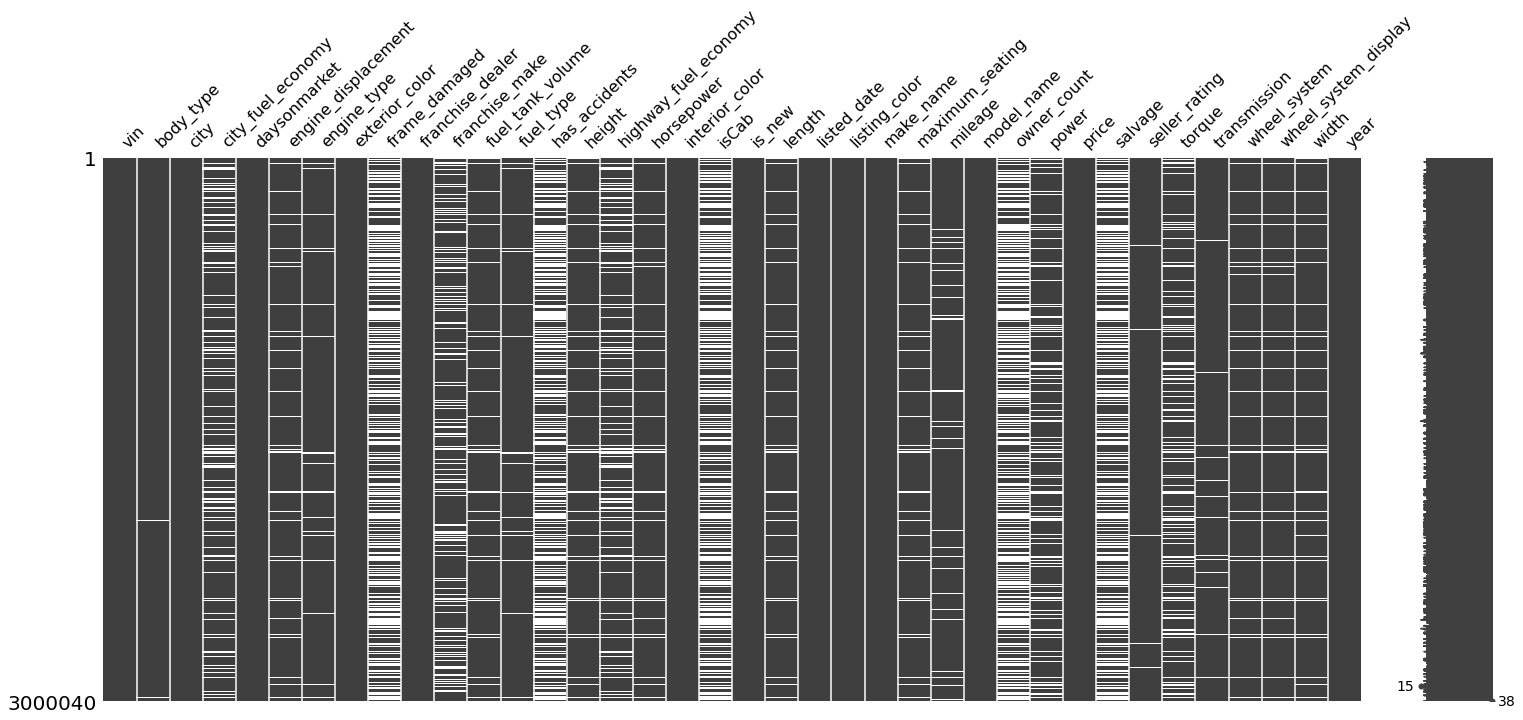

In [13]:
#visualizing the 
msno.matrix(df_cln_2)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

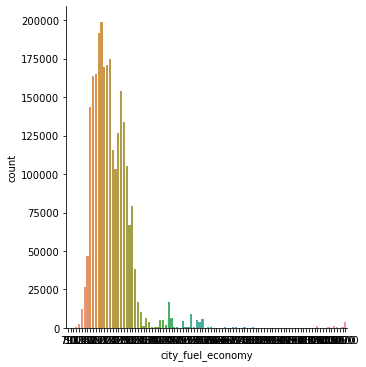

In [15]:
sns.catplot(x="city_fuel_economy", kind="count", data=df_cln_2)

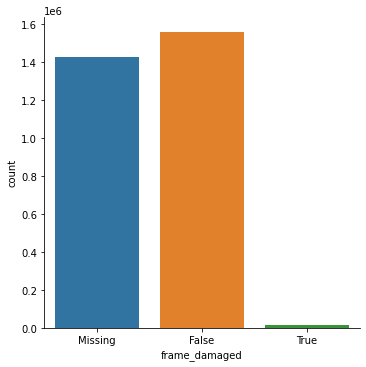

In [35]:
sns.catplot(x="frame_damaged", kind="count", data=df_cln_2.fillna('Missing'))

In [34]:
print(df_cln_2[['frame_damaged']].notnull().sum())
print(df_cln_2[['frame_damaged']].isnull().sum())
print(df_cln_2['frame_damaged'].unique())

frame_damaged    1573445
dtype: int64
frame_damaged    1426595
dtype: int64
[nan False True]


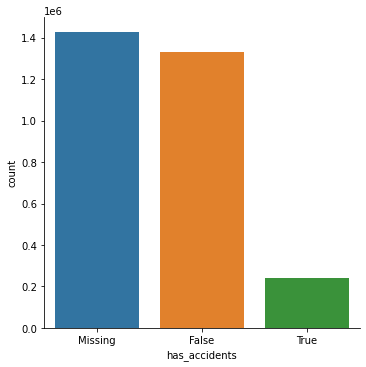

In [36]:
sns.catplot(x="has_accidents", kind="count", data=df_cln_2.fillna('Missing'))

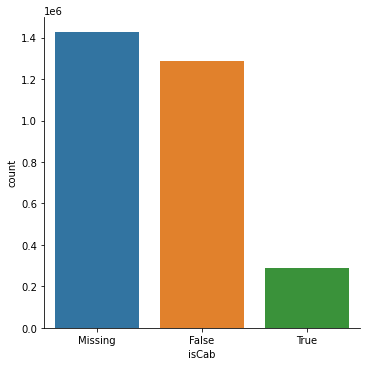

In [37]:
sns.catplot(x="isCab", kind="count", data=df_cln_2.fillna('Missing'))

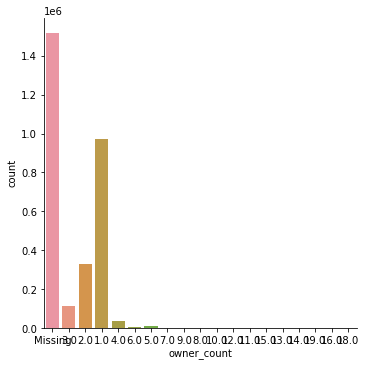

In [38]:
sns.catplot(x="owner_count", kind="count", data=df_cln_2.fillna('Missing'))

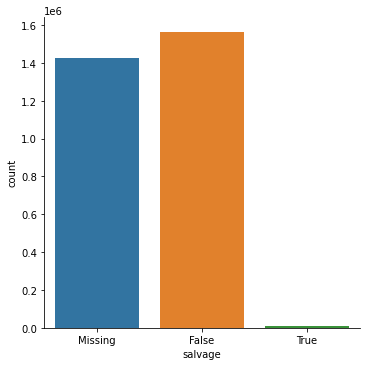

In [39]:
sns.catplot(x="salvage", kind="count", data=df_cln_2.fillna('Missing'))